# N2V Prediction
Please run the ```1_N2VTraining.ipynb``` before.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tifffile import imread

from ppn2v.unet.model import UNet
from ppn2v import utils, prediction

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
# We need the training data in order to calulate 'mean' and 'std' for normalization
path='../../../data/Mouse skull nuclei/'

# Load the test data
dataTest=imread(path+"example2_digital_offset300.tif")[:,:,:256] 
# We are loading only a sub image to speed up computation

# We estimate the ground truth by averaging.
dataTestGT=np.mean(dataTest[:,...],axis=0)[np.newaxis,...]


### Load the Network and Noise Model
Ensure that ```dataName``` is set same as in ```01_N2VTraining.ipynb```.

In [3]:
dataName = 'mouseskullnuclei' # Use the same name as used in N2VTraining.ipynb. This is a part of model name created in N2VTraining.ipynb 
nameModel=dataName+'_n2v'

### Load the Network

In [4]:
# Load the network, created in the '01_N2VTraining.ipynb' notebook
net=torch.load(path+"/last_"+nameModel+".net")

### Evaluation

image: 0
PSNR input 28.02423798473431
PSNR prior 35.599629229570276
PSNR mse 35.599629229570276
-----------------------------------
image: 1
PSNR input 28.065531602490644
PSNR prior 35.746043925320606
PSNR mse 35.746043925320606
-----------------------------------
image: 2
PSNR input 28.035021421910734
PSNR prior 35.69684478893151
PSNR mse 35.69684478893151
-----------------------------------
image: 3
PSNR input 28.087744381628678
PSNR prior 35.76754122751098
PSNR mse 35.76754122751098
-----------------------------------
image: 4
PSNR input 28.061745249613562
PSNR prior 35.65853938368597
PSNR mse 35.65853938368597
-----------------------------------
image: 5
PSNR input 28.1086316653067
PSNR prior 35.76217576608183
PSNR mse 35.76217576608183
-----------------------------------
image: 6
PSNR input 28.11584919615069
PSNR prior 35.83978143373206
PSNR mse 35.83978143373206
-----------------------------------
image: 7
PSNR input 28.078571033189487
PSNR prior 35.74100823162425
PSNR mse 35.741

image: 66
PSNR input 28.129393849352013
PSNR prior 35.7952072182736
PSNR mse 35.7952072182736
-----------------------------------
image: 67
PSNR input 28.11863774042713
PSNR prior 35.76794394952203
PSNR mse 35.76794394952203
-----------------------------------
image: 68
PSNR input 28.0744924081312
PSNR prior 35.75870674776051
PSNR mse 35.75870674776051
-----------------------------------
image: 69
PSNR input 28.087115550087496
PSNR prior 35.811444389729616
PSNR mse 35.811444389729616
-----------------------------------
image: 70
PSNR input 28.100664171847036
PSNR prior 35.833792786090264
PSNR mse 35.833792786090264
-----------------------------------
image: 71
PSNR input 28.1022497917701
PSNR prior 35.77160806312267
PSNR mse 35.77160806312267
-----------------------------------
image: 72
PSNR input 28.147053880531487
PSNR prior 35.77756280588389
PSNR mse 35.77756280588389
-----------------------------------
image: 73
PSNR input 28.10360697863469
PSNR prior 35.83851086806537
PSNR mse 35

image: 132
PSNR input 28.115379662314908
PSNR prior 35.79131964339584
PSNR mse 35.79131964339584
-----------------------------------
image: 133
PSNR input 28.136598736570747
PSNR prior 35.79761625456402
PSNR mse 35.79761625456402
-----------------------------------
image: 134
PSNR input 28.155716038813438
PSNR prior 35.83898858920482
PSNR mse 35.83898858920482
-----------------------------------
image: 135
PSNR input 28.085705019467397
PSNR prior 35.78422000508744
PSNR mse 35.78422000508744
-----------------------------------
image: 136
PSNR input 28.109437508908528
PSNR prior 35.796657121812196
PSNR mse 35.796657121812196
-----------------------------------
image: 137
PSNR input 28.120960359275994
PSNR prior 35.80882831268019
PSNR mse 35.80882831268019
-----------------------------------
image: 138
PSNR input 28.12270100924804
PSNR prior 35.79273687785934
PSNR mse 35.79273687785934
-----------------------------------
image: 139
PSNR input 28.147226761888323
PSNR prior 35.7889311670306

image: 198
PSNR input 28.142133401788897
PSNR prior 35.85383393832984
PSNR mse 35.85383393832984
-----------------------------------
image: 199
PSNR input 28.110352018291994
PSNR prior 35.70376313841601
PSNR mse 35.70376313841601
-----------------------------------
Avg PSNR Prior: 35.79446163587743 +-(2SEM) 0.007813243561185405
Avg PSNR MMSE: 35.79446163587743 +-(2SEM) 0.007813243561185405


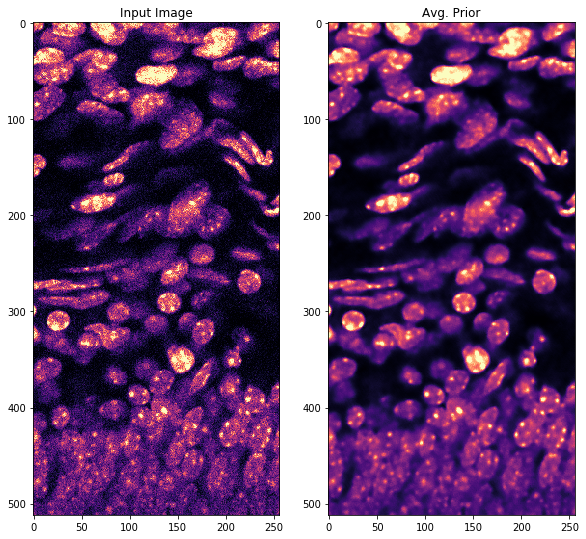

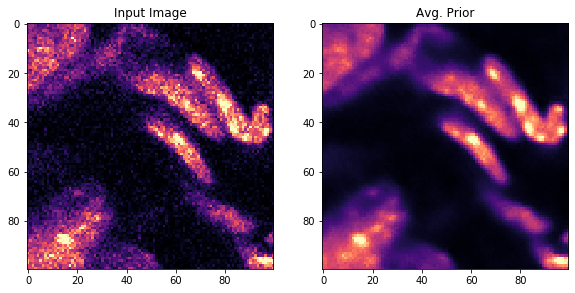

In [5]:
# Now we are processing data and calculating PSNR values.
results=[]
meanRes=[]
resultImgs=[]
inputImgs=[]

# We iterate over all test images.
for index in range(dataTest.shape[0]):
    
    im=dataTest[index]
    gt=dataTestGT[0] # The ground truth is the same for all images
    
    # We are using tiling to fit the image into memory
    # If you get an error try a smaller patch size (ps)
    
    means = prediction.tiledPredict(im, net ,ps=256, overlap=48,
                                            device=device, noiseModel=None)
    
    resultImgs.append(means)
    inputImgs.append(im)

    rangePSNR=np.max(gt)-np.min(gt)
    psnr=utils.PSNR(gt, means,rangePSNR )
    psnrPrior=utils.PSNR(gt, means,rangePSNR )
    results.append(psnr)
    meanRes.append(psnrPrior)

    print ("image:",index)
    print ("PSNR input",utils.PSNR(gt, im, rangePSNR))
    print ("PSNR prior",psnrPrior) # Without info from masked pixel
    print ("PSNR mse",psnr) # MMSE estimate using the masked pixel
    print ('-----------------------------------')

    
    
    
# We display the results for the last test image       
vmi=np.percentile(gt,0.01)
vma=np.percentile(gt,99)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means, vmax=vma, vmin=vmi, cmap='magma')

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

print("Avg PSNR Prior:", np.mean(np.array(meanRes) ), '+-(2SEM)',2*np.std(np.array(meanRes) )/np.sqrt(float(len(meanRes)) ) )
print("Avg PSNR MMSE:", np.mean(np.array(results) ),  '+-(2SEM)' ,2*np.std(np.array(results) )/np.sqrt(float(len(results)) ) )